In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.densenet121(pretrained=True)
time1 = time.time()
print(model)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [2]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Linear(1024,6)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

transfer_Densenet121_Adam
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.2908, Accuracy: 55.2602%,Valid: Loss: 0.9201, Accuracy: 74.3902%,Time: 8.4387s
Epoch: 2
Epoch: 002, Training: Loss: 0.7542, Accuracy: 79.2421%,Valid: Loss: 0.7079, Accuracy: 79.2683%,Time: 8.4113s
Epoch: 3
Epoch: 003, Training: Loss: 0.5899, Accuracy: 82.6923%,Valid: Loss: 0.6149, Accuracy: 82.6220%,Time: 8.7148s
Epoch: 4
Epoch: 004, Training: Loss: 0.5028, Accuracy: 85.1244%,Valid: Loss: 0.5323, Accuracy: 82.9268%,Time: 8.6205s
Epoch: 5
Epoch: 005, Training: Loss: 0.4327, Accuracy: 87.8959%,Valid: Loss: 0.4860, Accuracy: 82.3171%,Time: 8.4939s
Epoch: 6
Epoch: 006, Training: Loss: 0.3846, Accuracy: 89.5928%,Valid: Loss: 0.4720, Accuracy: 85.0610%,Time: 8.4881s
Epoch: 7
Epoch: 007, Training: Loss: 0.3555, Accuracy: 90.2149%,Valid: Loss: 0.4304, Accuracy: 83.8415%,Time: 8.5447s
Epoch: 8
Epoch: 008, Training: Loss: 0.3234, Accuracy: 91.4027%,Valid: Loss: 0.4223, Accuracy: 84.4512%,Time: 8.4593s
Epoch: 9
Epoch: 009, 

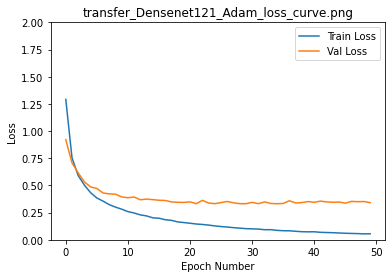

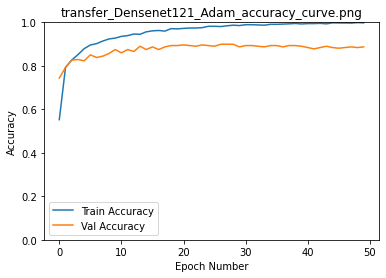

RuntimeError: CUDA error: out of memory

In [3]:
device = 9
model_name_list = ["transfer_Densenet121"]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+"Adam"
print(file_name)
optimizer = optim.Adam(model.parameters())
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=50,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)